<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/HW1_DL_Mequanent_110761504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Mequanent Argaw Muluneh** \\
**Id: 110761504**

In [1]:
# Clone the repository first using the following command
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 3.374s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1
Load ‘data.mat’ into your Python code, where you will find $x,y∈R^{1001}$. 

# Dataset

In [3]:
data = loadmat(r"Ex1/data.mat") 
x = data['x'] 
y = data['y'] 

## a. 
Plot the data using plot function. 

**Plot**

Text(0, 0.5, 'y')

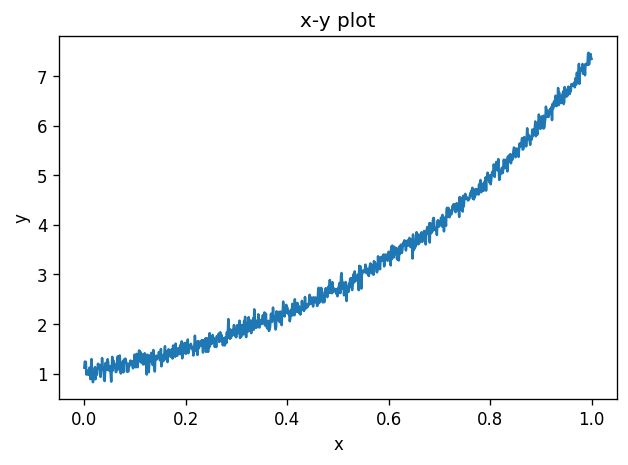

In [4]:
plt.figure(num=0, dpi=120) # set some quality(dpi) for better view
plt.plot(x, y)
plt.title("x-y plot")
plt.xlabel("x")
plt.ylabel("y")

## b. 
Compute the least square line $y=θ_0+xθ_1$ using the given data and overlay the line over the given data.

In [5]:
def linear_regression(x, y):
  ones = np.repeat(1, len(x)) # coefficients for θ0 to have one column in x
  X = np.array([ones, x.flatten()]) # insert the ones at the left of x as coefficient of θ0
  X = X.T # 2x1001 --> 1001x2, size rearrangement
  θ = np.matmul(np.linalg.pinv(X), (y)) 
  θ = θ.flatten() 
  θ0, θ1 = θ[0], θ[1] 
  Y = θ0 + θ1 * x 
  return Y

In [6]:
# plot function made common for both linear and quadratic linear regression
def linear_regression_plot(flag): 
  """ flag to be a string with values either linear or quadratic """ 
  plt.figure(num=0, dpi=120)
  plt.plot(x, y, label = r"expected")
  if flag == "linear":
    plt.plot(x, linear_regression(x, y), "r", 
             label="least square line: $y=θ_0+xθ_1$")
  elif flag == "quadratic":
    plt.plot(x, quadratic_linear_regression(x, y), "r", 
             label="least square line: $y=θ_0+xθ_1+x^2θ_2$")
  else:
    print("please pass either linear or quadratic argument for this function")

  plt.title("x-y plot")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()

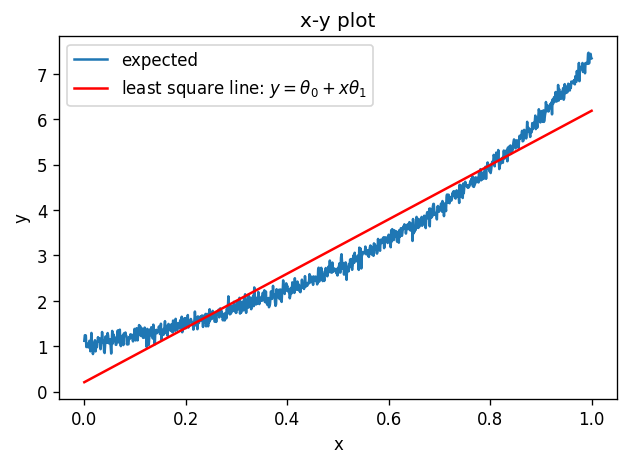

In [7]:
linear_regression_plot("linear")

# 2. 
Using the same data from Question 2, compute the least square parabola (i.e. second order polynomial $y=θ_0+xθ_1+x^2 θ_2)$ to fit the data. (5%) Explain which formulation (line or parabola) is more suitable for this dataset and why (please calculate the mean square error for these two fitting equations)?

In [8]:
def quadratic_linear_regression(x, y): 
  ones = np.repeat(1, len(x)) # coefficients for θ0 to have one column in x 
  squares = (x**2).flatten() # x^2 to be multiplied by θ2 as third columns 
  X = np.array([ones, x.flatten(), squares]) # insert the ones at the left 
                                              #and squares on the right of x 
  X = X.T # 3x1001 --> 1001x3, size rearrangement  

  θ = np.matmul(np.linalg.pinv(X), (y)) 
  θ = θ.flatten() 
  θ0, θ1, θ2 = θ[0], θ[1], θ[2] 
  # Predict the expected values of y 
  Y = θ0 + θ1 * x + θ2 * (x ** 2)
  return Y

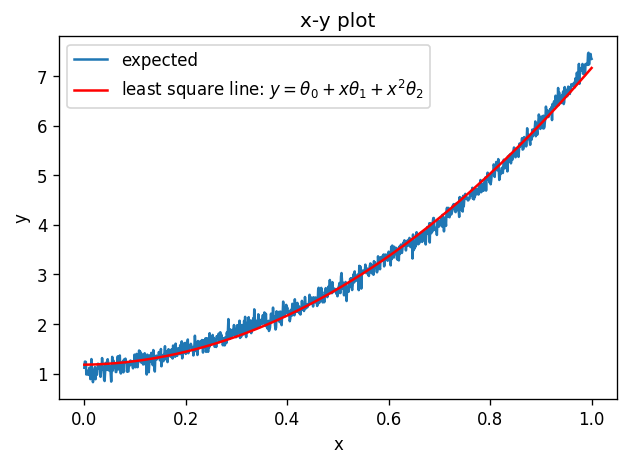

In [9]:
linear_regression_plot("quadratic")

In [10]:
# Mean squared error 
def mean_squared_error(y, y_pred):
  diff = y - y_pred
  diff_squares = diff ** 2
  diff_sum = np.sum(diff_squares) / len(y)
  mse =  np.sqrt(diff_sum) 
  return mse 

mse1 = mean_squared_error(y, linear_regression(x, y))
mse2 = mean_squared_error(y, quadratic_linear_regression(x, y))
print(f"mse for line is: {mse1} while mse for parabola is: {mse2}.")

mse for line is: 0.453658425277404 while mse for parabola is: 0.12547876286929024.


 Explain which formulation (line or parabola) is more suitable for this dataset and why. \\
 **Ans:** \\
**The parabola is more suitable for this dataset because the prediction for y  with the parabola is more closer than with the line as the root mean squared error and the visual plots indicate it clearly.** \\
**The prediction error is less when using quadratic linear regression.**

# 3. 
(15%)
Following the previous two questions, please randomly select $100$ data samples for $50$ times and plot these $50$ lines $(y=θ_0+xθ_1)$ and parabolas $(y=θ_0+xθ_1+x^2 θ_2)$ in two separate figures, one for lines and the other for parabolas. (5%) Explain these visualizations based on the bias and variance.

In [11]:
lines = [] # to hold list of 50 linear regression predictions 
parabolas = [] # to hold list of 50 quadratic linear regression predictions 
samples = [] 
for i in range(50): 
  samp = np.random.randint(1001, size=100) 
  samp = np.sort(samp) 
  xs = x.flatten()[samp] 
  ys = y.flatten()[samp] 
  Y1 = linear_regression(xs, ys) 
  Y2 = quadratic_linear_regression(xs, ys) 
  lines.append([xs, Y1]) 
  parabolas.append([xs, Y2]) 
  samples.append(xs) 

In [12]:
# a plot method for lines and parabolas
def plot(func, title):
  """ 
  func is to represent either the lines or the parabolas.
  The first two dimensions/principal components are shown in this plot.
  """
  plt.figure(num=0, dpi=120)
  for i in range(len(func)):
    plt.plot(func[i][0], func[i][1], label = f"line {i}")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(title)
  plt.show()

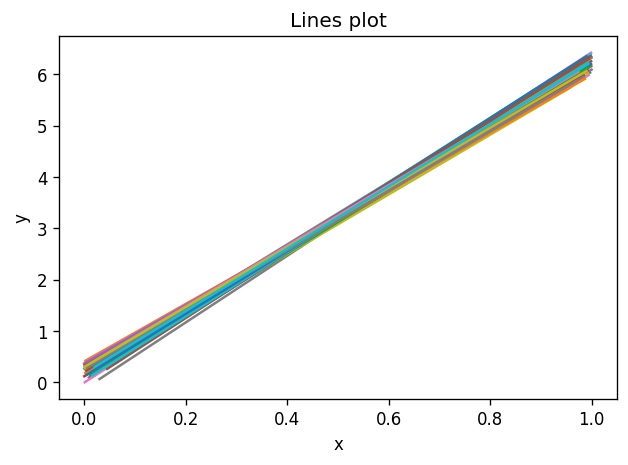

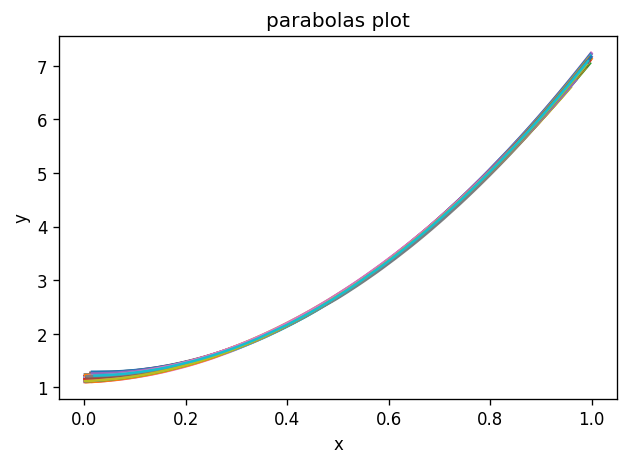

In [13]:
plot(lines, "Lines plot") 
plot(parabolas, "parabolas plot")

The linear regression has a larger bias which shows its inability to capture the true relationship between the independent and the dependent variables. But the parabola fits more and show better prediction. 

# 4. 
(10%) 
In ‘train.mat,’ you can find 2-D points $X=[x1, x2]$ and their corresponding labels $Y=y$. Please use logistic regression $h(θ)=1/(1+e^(-θ^T x))$  to find the decision boundary (optimal $θ^*$) based on ‘train.mat.” Please use a gradient descent method to solve it and report the test error on the test dataset ‘test.mat.’ (percentage of misclassified test samples) 

In [14]:
train_mat = loadmat(r"Ex1/train.mat")
test_mat = loadmat(r"Ex1/test.mat")

train, test = pd.DataFrame(), pd.DataFrame() 
'''data frame is used to better rearrange the values in the numpy array'''

train["x1"], train["x2"] = train_mat['x1'].flatten(),  train_mat['x2']
test["x1"],test["x2"]  = test_mat['x1'].flatten(),  test_mat['x2']

train["y"], test["y"]  = train_mat['y'], test_mat['y']

train.head(3)

,x1,x2,y
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1


In [15]:
# Separate back the features and the labels 
x_train = train.values[:,:2] # nx2 size
x_test = test.values[:,:2]

y_train = train.values[:,2]
y_test = test.values[:,2]

In [16]:
x_train = x_train.T
x_test = x_test.T

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2, 70), (1, 70), (2, 30), (1, 30))

**Logistic regression using gradient descent weight optimization**

In [17]:
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

def logistic_regression(X, Y, learning_rate, iterations):
  m = X.shape[1]
  n = X.shape[0]

  # let B and θ be initialized to 0
  B = 0 
  θ = np.zeros((n, 1))

  errors = []
  for i in range(iterations):
    Z = np.dot(θ.T, X) + B
    Y_pred = sigmoid(Z)

    # loss function 
    loss = -(1/m) * np.sum(Y * np.log(Y_pred) + (1-Y) * np.log(1 - Y_pred)) 

    # Gradient Descent 
    dθ = (1/m) * np.dot(Y_pred - Y, X.T) 
    dB = (1/m) * np.sum(Y_pred - Y) 

    θ = θ - learning_rate * dθ.T # update weights 
    B = B - learning_rate * dB # update bias 

    # keeping track of our losses 
    errors.append(loss) 

    # display some losses 
    if (i % (iterations/100) == 0):
      print(f"cost after {i} iterations is : {loss}")

  return θ, B, errors 

In [18]:
iterations = 10000 
learning_rate = 0.05 # set to 0.05 after several trials
θ, B, errors = logistic_regression(x_train, y_train, learning_rate, iterations)

cost after 0 iterations is : 0.6931471805599454
cost after 100 iterations is : 0.4444298254603646
cost after 200 iterations is : 0.3274923017924057
cost after 300 iterations is : 0.2622430018754115
cost after 400 iterations is : 0.22093470387363684
cost after 500 iterations is : 0.19241562680393912
cost after 600 iterations is : 0.171486086953852
cost after 700 iterations is : 0.1554229927407999
cost after 800 iterations is : 0.14266837945859254
cost after 900 iterations is : 0.1322677757810306
cost after 1000 iterations is : 0.12360392444097608
cost after 1100 iterations is : 0.11625980970825711
cost after 1200 iterations is : 0.10994337810005023
cost after 1300 iterations is : 0.10444384464311281
cost after 1400 iterations is : 0.09960514691394699
cost after 1500 iterations is : 0.09530918011987563
cost after 1600 iterations is : 0.09146485140210357
cost after 1700 iterations is : 0.08800072442425608
cost after 1800 iterations is : 0.08485995029121407
cost after 1900 iterations is : 

**See the loss curve**

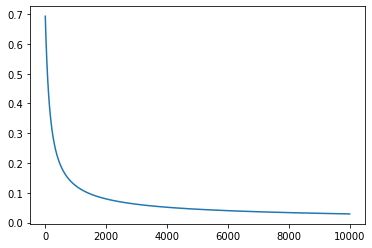

In [19]:
plt.plot(np.arange(iterations), errors) 
plt.show() 

In [21]:
def accuracy(X, Y, θ, B):
    
    Z = np.dot(θ.T, X) + B # 
    A = sigmoid(Z) # 
    
    A = A > 0.5 # categorize the values into one of the two categories 
    
    A = np.array(A, dtype = 'int64') # boolean to 0 or 1
    pred_error = np.sum(np.absolute(A - Y))/len(Y[0]) 
    acc = (1 - pred_error) * 100 
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

accuracy(x_test, y_test, θ, B)

Accuracy of the model is :  96.67 %


# 5.	
Download the MNIST dataset using the following example code:

In [22]:
##############################################
from __future__ import print_function
import keras
from keras.datasets import mnist

# input image dimensions 28x28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
##############################################

11490434/11490434 [==============================] - 0s 0us/step


In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Please randomly choose 1,000 different handwritten images from either the training or the testing dataset to construct your own dataset, where each digit has 100 data samples.



In [26]:
!pip install numpy_indexed -q

In [28]:
''' This library is used to get the unique values in a numpy array 
and their corresponding list of indices. '''
import numpy_indexed as npi 

In [29]:
# a function to sample n samples from each category
def take_n_samples(x, y, n):
  # get the list of indices for each digit
  _, idx_groups = npi.group_by(y, np.arange(len(y)))

  indices = []

  for i in range(len(idx_groups)):
    indexes = np.random.choice(idx_groups[i], n)
    indices.append(list(indexes))
  
  indices = np.array(indices).flatten()
  np.random.shuffle(indices) # shuffle the indices before getting the data parts
  
  x_sample = x_train[indices]
  
  y_sample = y_train[indices]
  
  return x_sample, y_sample

x_test, y_test = take_n_samples(x_train, y_train, 100)
x_test.shape, y_test.shape

((1000, 28, 28), (1000,))

## 5.1.	
(5%) Use the following code to show 50 images in your own dataset. 

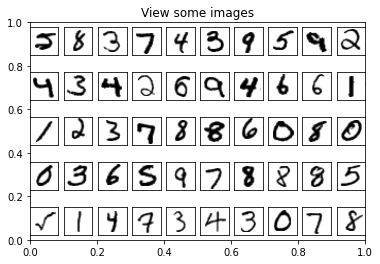

In [30]:
def plot_sample_digits(x_test, y_test, title):  
  ##############################################
  amount= 50
  lines = 5
  columns = 10
  number = np.zeros(amount)

  for i in range(amount):
      number[i] = y_test[i]
      # print(number[0])

  fig = plt.figure()
  plt.title(title)
  
  for i in range(amount):
      ax = fig.add_subplot(lines, columns, 1 + i)
      plt.imshow(x_test[i,:,:], cmap='binary')
      #plt.imshow(x_test[i,:], cmap='binary')
      plt.sca(ax)
      
      ax.set_xticks([], [])
      ax.set_yticks([], [])

  plt.show()
  ##############################################  
plot_sample_digits(x_test, y_test, "View some images")

## 5.2.	
(15%) Normalize the data (subtracting the mean from it and then dividing it by the standard deviation) and compute the eigenpairs for the covariance of the data (sorted in a descending order based on eigenvalues).

In [31]:
def normalize(X): 
    x_mean = np.mean(X, axis=0) 
    std = np.std(X, axis=0) 
    if 0 in std: # to handle zero values in std and avoid NaN in the normalized data
      std[std==0] = 1.0
    x_norm = (X-x_mean) /std # there are some zero values in the std making division undefined.
    return x_norm.T, x_mean, std # x_norm.T is to comply with x is nxm matrix

In [32]:
x_test = np.reshape(x_test, (x_test.shape[0], -1)) # (1000, 28, 28) --> (1000, 784) 
x_norm, x_mean, std = normalize(x_test)
x_norm.shape, x_mean.shape, std.shape, x_test.shape

((784, 1000), (784,), (784,), (1000, 784))

In [34]:
# check if there are nan values
np.isnan(x_test).any(), np.isnan(x_norm).any(), np.isnan(x_mean).any(), np.isnan(std).any()

(False, False, False, False)

**Covariance**

In [35]:
cov = np.cov(x_norm)
cov.shape 

(784, 784)

In [36]:
cov.min(), cov.max()

(-0.4606273785070235, 1.0010501806572862)

**Eigenpairs** for the covariance of the data (sorted in a descending order based on eigenvalues)

In [37]:
eigvals, eigvecs = np.linalg.eig(cov) # get eigen values and eigen vectors
sort_indices = np.argsort(eigvals) # sort in ascending order
sort_indices = np.flip(sort_indices) # reverse in decreasing order

eigvals, eigvecs = eigvals[sort_indices], eigvecs[:, sort_indices]

## 5.3.	 
(15%) Please use PCA to reduce the 784-dimensional data to that with 500, 300, 100, and 50 dimensions, and then show the decoding results, respectively. How do you interpret the results?

**Get the D vectors from the pool of eigen vectors**

In [38]:
D500 = eigvecs[:, :500] # to reduce to 500 dimensions below
D300 = eigvecs[:, :300]
D100 = eigvecs[:, :100]
D50 = eigvecs[:, :50]

In [ ]:
D50.shape, x_norm.shape # D vectors will be nxk size; k is in {500, 300, 100, 50}

((784, 50), (784, 1000))

**PCA Encoding is: $D^TX$**

In [39]:
_500_dim = D500.T @ x_norm # kxn * nxm = kxm ==> 500x1000 dimension
_300_dim = D300.T @ x_norm
_100_dim = D100.T @ x_norm
_50_dim = D50.T @ x_norm

In [40]:
_500_dim.shape, _300_dim.shape, _100_dim.shape , _50_dim.shape # check sizes

((500, 1000), (300, 1000), (100, 1000), (50, 1000))

**Decoding: $DD^TX$**


In [42]:
_500 = np.abs(D500  @ D500.T @ x_norm) # nxk * kxn * nxm = nxm: decoded back
_300 = np.abs(D300  @ D300.T @ x_norm)
_100 = np.abs(D100  @ D100.T @ x_norm)
_50 = np.abs(D50  @ D50.T @ x_norm)

_500.shape # to see if the dimension is correct

(784, 1000)

In [43]:
# get back original data from the normalized data 
_500decode = _500.T * std + x_mean 
_300decode = _300.T * std + x_mean 
_100decode = _100.T * std + x_mean 
_50decode = _50.T * std + x_mean 

# convert back to 3d 
_500decode_3d = _500decode.reshape(1000, 28, 28) # (1000, 784) --> (1000, 28, 28)
_300decode_3d = _300decode.reshape(1000, 28, 28) 
_100decode_3d = _100decode.reshape(1000, 28, 28) 
_50decode_3d = _50decode.reshape(1000, 28, 28) 

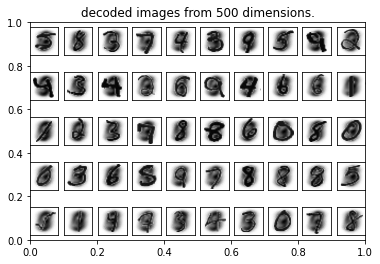

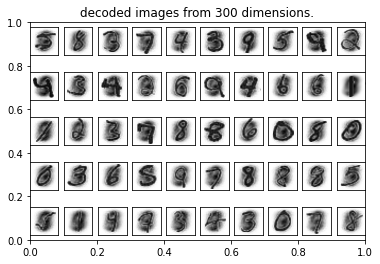

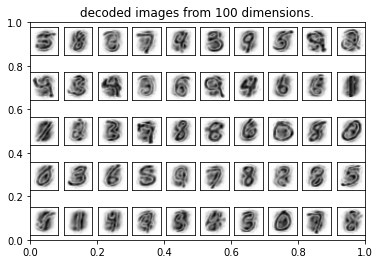

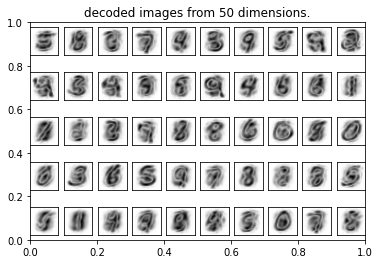

In [44]:
plot_sample_digits(_500decode_3d, y_test, "decoded images from 500 dimensions.") 
plot_sample_digits(_300decode_3d, y_test, "decoded images from 300 dimensions.") 
plot_sample_digits(_100decode_3d, y_test, "decoded images from 100 dimensions.") 
plot_sample_digits(_50decode_3d, y_test, "decoded images from 50 dimensions.") 

According to the tutorial in [this video](https://youtu.be/xvfJXNGCQBM), the sum of all eigen values is the total variance of the system along all dimensions. If we select n components of which the sum of eigen values will be greater than $90\%$ of the total variance it will be more representative. \\
As we can see from the sum of eigen values below (and the above figures also), **dimensions $500$ and $300$ are more representative**. Edges in the figures with higher dimension are more visible.

In [45]:
# total variance of the system and total varaince in each dimension
np.sum(eigvals), np.sum(eigvals[:500]), np.sum(eigvals[:300]), np.sum(eigvals[:100]), np.sum(eigvals[:50])

(615.6157707195792,
 614.9929442895542,
 605.6516027489293,
 518.4643473824725,
 419.65227626308734)

In [46]:
# 90%, 95% and 99% of the total variance
0.9*np.sum(eigvals), 0.95*np.sum(eigvals), 0.99*np.sum(eigvals)

(554.0541936476213, 584.8349821836002, 609.4596130123834)

# END